#**Ансамбли моделей машинного обучения**

**Цель лабораторной работы**\
Изучение ансамблей моделей машинного обучения.

**Задание**
1.  Выберите набор данных (датасет) для решения задачи классификации или регресии.
2.  В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3.  С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

##**Решение**

###**Импорт библиотек и загрузка данных**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
sns.set(style="ticks")

In [3]:
# загрузка данных
uploaded = files.upload()

Saving pulsar_stars.csv to pulsar_stars.csv


In [4]:
data = pd.read_csv('pulsar_stars.csv', sep=',')

###**Характеристики датасета**

В лабораторной работе используется датасет Pulsar Stars. Датасет содержит характеристики звезды и ее принадлежность к пульсарам или нет.\
**В датасете представлены следующие признаки:**
-  Mean of the integrated profile - среднее значение интегрированного профиля
-  Standard deviation of the integrated profile - стандартное отклонение интегрированного профиля
-  Excess kurtosis of the integrated profile - чрезмерный эксцесс интегрированного профиля
-  Skewness of the integrated profile - перекос интегрированного профиля
-  Mean of the DM-SNR curve - среднее значение кривой DM-SNR
-  Standard deviation of the DM-SNR curve - стандартное отклонение кривой DM-SNR
-  Excess kurtosis of the DM-SNR curve - избыточный эксцесс кривой DM-SNR
-  Skewness of the DM-SNR curve - асимметрия кривой DM-SNR
-  target_class - 0 (не является пульсаром), 1 (является пульсаром)

In [5]:
# размер датасета
data.shape

(17898, 9)

In [6]:
# типы колонок
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [7]:
# первые 5 строк
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [8]:
# статистические характеристики признаков
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [9]:
# Количество пропусков в данных
data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [10]:
# Количество уникальных значений для каждого признака
data.nunique()

 Mean of the integrated profile                   8626
 Standard deviation of the integrated profile    17862
 Excess kurtosis of the integrated profile       17897
 Skewness of the integrated profile              17898
 Mean of the DM-SNR curve                         9000
 Standard deviation of the DM-SNR curve          17894
 Excess kurtosis of the DM-SNR curve             17895
 Skewness of the DM-SNR curve                    17895
target_class                                         2
dtype: int64

В качестве метрик для решения задачи классификации будем использовать:
-  Precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
-  Recall - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.
-  F-мера - среднее гармоническое precision и recall

###**Разделение выборки на обучающую и тестовую**

In [11]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [12]:
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [13]:
# Признаки для задачи классификации
class_cols = [' Mean of the integrated profile',
             ' Standard deviation of the integrated profile',
             ' Excess kurtosis of the integrated profile',
             ' Skewness of the integrated profile',
             ' Mean of the DM-SNR curve',
             ' Standard deviation of the DM-SNR curve',
             ' Excess kurtosis of the DM-SNR curve']

In [14]:
X = data[class_cols]
Y = data['target_class']
X.shape

(17898, 7)

In [15]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [16]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13423, 7), (4475, 7), (13423,), (4475,))

###**Обучение моделей**

In [61]:
def train_model(model_name, model, metrics):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)

    metrics.update(precision=precision)
    metrics.update(recall=recall)
    metrics.update(f1=f1)

    print(f'--------------------{model_name}--------------------')
    print(model_name)
    print(model)
    print("precision_score:", precision)
    print("recall_score:", recall)
    print("f1_score", f1)
    print(f'--------------------{model_name}--------------------')

In [62]:
# словарь для хранения метрик
metrics_random_forest = {}
metrics_gradient_boosting = {}

In [63]:
train_model('Случайный лес', RandomForestClassifier(), metrics_random_forest)
train_model('Градиентный бустинг', GradientBoostingClassifier(), metrics_gradient_boosting)

--------------------Случайный лес--------------------
Случайный лес
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
precision_score: 0.9216216216216216
recall_score: 0.844059405940594
f1_score 0.8811369509043927
--------------------Случайный лес--------------------
--------------------Градиентный бустинг--------------------
Градиентный бустинг
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,


###**Сравнение качества полученных моделей**

In [64]:
def plot_compare_two_metrics(header, metric1, metric2):
      array_labels = ['Случайный лес', 'Градиентный бустинг']
      array_metric = [metric1, metric2]
      fig, ax1 = plt.subplots(figsize=(5,5))
      pos = np.arange(len(array_metric))
      rects = ax1.barh(pos, array_metric,
                        align='center',
                        height=0.5, 
                        tick_label=array_labels)
      ax1.set_title(header)
      for a,b in zip(pos, array_metric):
          plt.text(0.5, a-0.05, str(round(b,3)), color='white')
      plt.show()

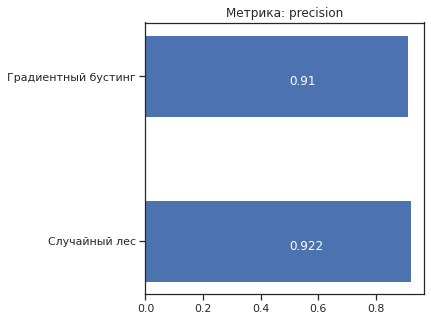

In [65]:
plot_compare_two_metrics('Метрика: precision', metrics_random_forest.get('precision'), metrics_gradient_boosting.get('precision'))

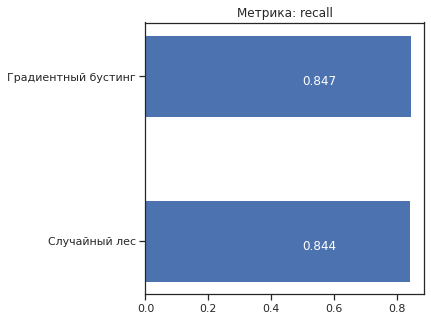

In [66]:
plot_compare_two_metrics('Метрика: recall', metrics_random_forest.get('recall'), metrics_gradient_boosting.get('recall'))

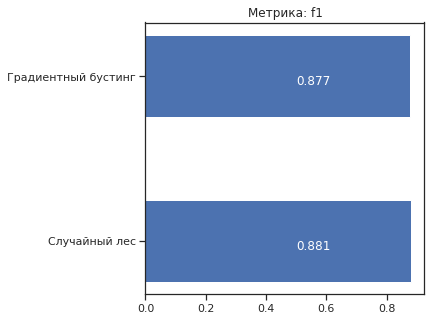

In [67]:
plot_compare_two_metrics('Метрика: f1', metrics_random_forest.get('f1'), metrics_gradient_boosting.get('f1'))

Как видно значение метрики *precision* выше у модели случайный лес, однако у нее ниже значение метрики *recall*. Метрика *f1* является объединением метрик *precision* и *recall* и она выше у модели случайный лес, поэтому можно сделать вывод, что модель случайный лес оказалась лучше.

